# I. 3D model

In [1]:
from simple_maize import *
from matplotlib.pylab import plot, show, xlim, ylim, axes
import numpy
from TD_maize import maize,display,generate_mtg, illuminate,plant_irradiance
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Parameters range are done in TD_sensitivity_Agreenium.R

## I.1 plant height

In [23]:
phytomer=16
nb_young_phy = int(round((phytomer - 1.95) / 1.84 / 1.3))
pseudostem_dist=1.4
pseudostem_height=20
stem_dist=1.
pseudostem = geometric_dist(height=pseudostem_height, nb_phy=nb_young_phy,q=pseudostem_dist)

plant_height_min=50
plant_height_max=300

stem_min = geometric_dist(height=plant_height_min - pseudostem_height,nb_phy=phytomer - nb_young_phy, q=stem_dist)
stem_max = geometric_dist(height=plant_height_max - pseudostem_height,nb_phy=phytomer - nb_young_phy, q=stem_dist)

stem_min,stem_max

([3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
 [28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0])

## I.2 Leaf area distribution along the stem

relative position of the leaf with highest area (rmax)

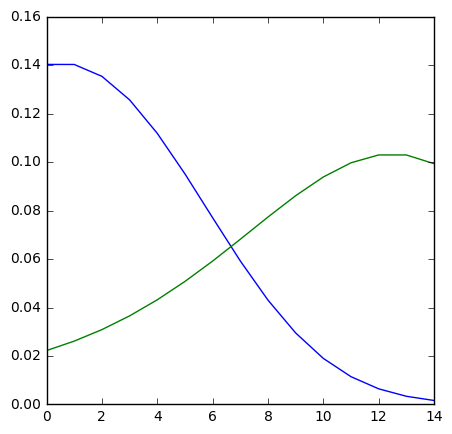

In [24]:
rmax_min=0.1
rmax_max=0.9
ymin=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=rmax_min,skew=0.15)
ymax=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=rmax_max,skew=0.15)
plot(ymin)
plot(ymax)

skewness of leaf area distribution (skew)

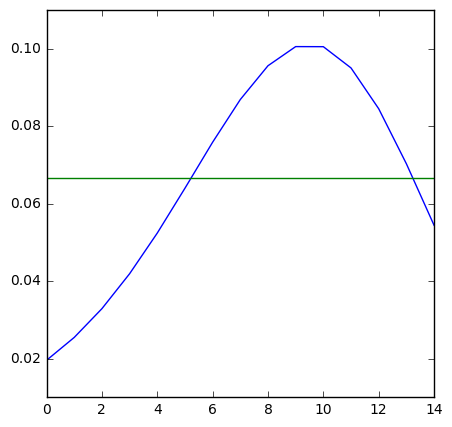

In [25]:
skew_min=0.05
skew_max=1
ymin=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=0.7,skew=skew_min)
ymax=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=0.7,skew=skew_max)
plot(ymin)
plot(ymax)

## I.3 leaf shape

ratio widht/length (wl)

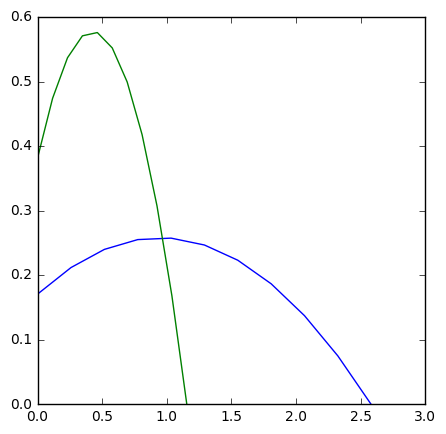

In [26]:
s,r=sr_prevot() #relative shape

leaf_area=0.5

wl_min=0.1
l_min=sqrt(leaf_area/(0.75*wl_min))
w_min=l_min*wl_min
s_min,r_min=s*l_min,r*w_min

wl_max=0.5
l_max=sqrt(leaf_area/(0.75*wl_max))
w_max=l_max*wl_max
s_max,r_max=s*l_max,r*w_max

plot(s_min,r_min)
plot(s_max,r_max)

##  I.4 Leaf curvature

### II.4.1 Base function

In [27]:
leaf_shape_perez(nb_segment=10,insertion_angle=65, delta_angle=180, coef_curv=-0.2)

(array([ 0.        ,  0.09063078,  0.18229699,  0.27673833,  0.3746242 ,
         0.47460233,  0.5720805 ,  0.65792097,  0.71778675,  0.73396768,
         0.69299361]),
 array([ 0.        ,  0.04226183,  0.08222813,  0.11510416,  0.13555794,
         0.1376493 ,  0.11533324,  0.06403593, -0.01606455, -0.11474676,
        -0.20596696]))

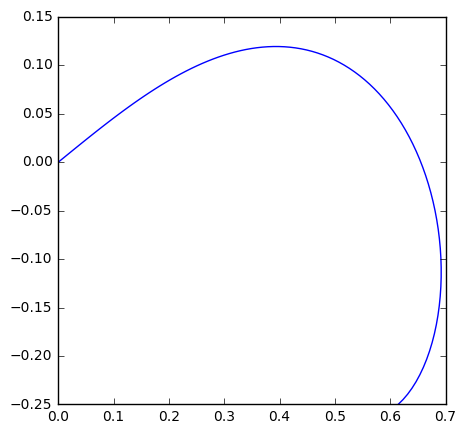

In [28]:
x,y=leaf_shape_perez(nb_segment=100,insertion_angle=65, delta_angle=180, coef_curv=-0.2)
plot(x,y)

### I.4.2 Variation of curvature with leaf rank

In [29]:

def leaf_shape_rank(rank=1,nb_segment=100,incli_top=50, delta_angle_top=180):
    incli_base=75
    delta_angle_base=250
    phytomer=16
    dinc = float(incli_top - incli_base) / (phytomer - 1)
    incli = incli_base + (rank -1) * dinc
    ddel = float(delta_angle_top - delta_angle_base) / (phytomer - 1)
    delta_angle = delta_angle_base + (rank - 1) * ddel
    return leaf_shape_perez(nb_segment=nb_segment,insertion_angle=incli, delta_angle=delta_angle, coef_curv=-0.2)

#### Curvature of top leaf (rank16)

Variation of inclination (incli_top)

(-0.6, 0.6)

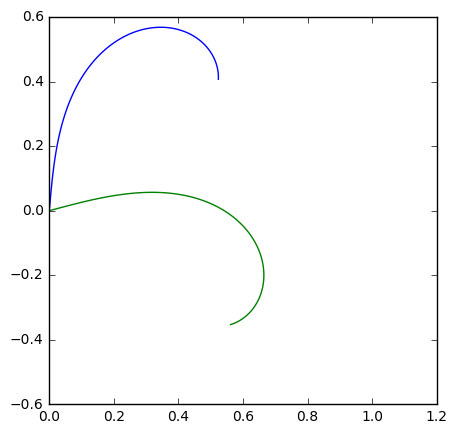

In [30]:
rank=16
incli_top_min=5
incli_top_max=75

x_min,y_min=leaf_shape_rank(rank=rank,incli_top=incli_top_min, delta_angle_top=180)
x_max,y_max=leaf_shape_rank(rank=rank,incli_top=incli_top_max, delta_angle_top=180)

plot(x_min,y_min)
plot(x_max,y_max)
xlim(0,1.2)
ylim(-0.6,0.6)
#numpy.sqrt(numpy.diff(x_max)**2 + numpy.diff(y_max)**2).sum()

Variation of curvature (delta_angle_top)

(-0.3, 0.9)

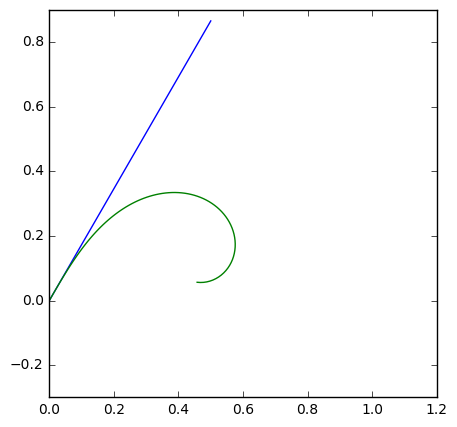

In [31]:
rank=16
delta_angle_top_min=0
delta_angle_top_max=250

x_min,y_min=leaf_shape_rank(rank=rank,incli_top=30, delta_angle_top=delta_angle_top_min)
x_max,y_max=leaf_shape_rank(rank=rank,incli_top=30, delta_angle_top=delta_angle_top_max)

plot(x_min,y_min)
plot(x_max,y_max)
xlim(0,1.2)
ylim(-0.3,0.9)
#numpy.sqrt(numpy.diff(x_max)**2 + numpy.diff(y_max)**2).sum()

#### Curvature at a given rank (rank=5)

Variation of inclination (incli_top)

(-0.6, 0.6)

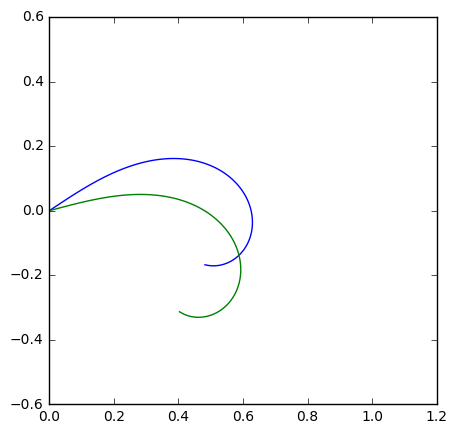

In [32]:
rank=5
incli_top_min=5
incli_top_max=75
x_min,y_min=leaf_shape_rank(rank=rank,incli_top=incli_top_min, delta_angle_top=180)
x_max,y_max=leaf_shape_rank(rank=rank,incli_top=incli_top_max, delta_angle_top=180)
plot(x_min,y_min)
plot(x_max,y_max)
xlim(0,1.2)
ylim(-0.6,0.6)
#numpy.sqrt(numpy.diff(x_max)**2 + numpy.diff(y_max)**2).sum()


Variation of curvature (delta_angle_top)

(-0.3, 0.6)

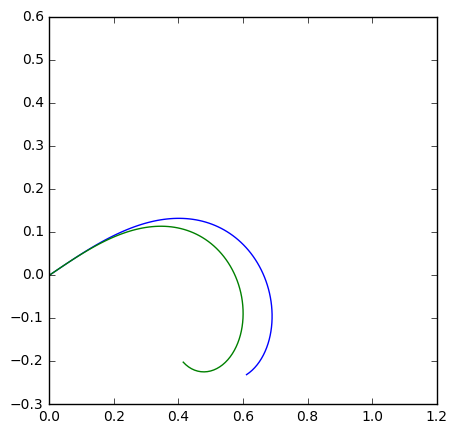

In [33]:
rank=5
delta_angle_top_min=0
delta_angle_top_max=250

x_min,y_min=leaf_shape_rank(rank=rank,incli_top=30, delta_angle_top=delta_angle_top_min)
x_max,y_max=leaf_shape_rank(rank=rank,incli_top=30, delta_angle_top=delta_angle_top_max)

plot(x_min,y_min)
plot(x_max,y_max)

xlim(0,1.2)
ylim(-0.3,0.6)

## I.5 Phyllotaxis

phyllotactic_angle

Populating the interactive namespace from numpy and matplotlib


(-1.1, 1.1)

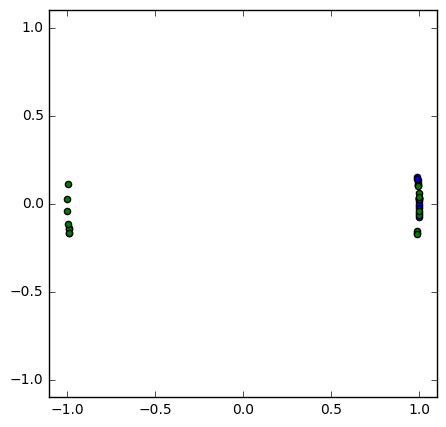

In [25]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

phytomer=16
phyllotactic_angle_min=0
phyllotactic_angle_max=180

az_min=leaf_azimuth(size=phytomer, phyllotactic_angle=phyllotactic_angle_min, phyllotactic_deviation=10, plant_orientation=0, spiral=False)*pi/180
az_max=leaf_azimuth(size=phytomer, phyllotactic_angle=phyllotactic_angle_max, phyllotactic_deviation=10, plant_orientation=0, spiral=False)*pi/180

x_min,y_min=pol2cart(rho=1,phi=az_min)
x_max,y_max=pol2cart(rho=1,phi=az_max)
    
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
#scatter(x,y,c=numpy.arange(phytomer))
scatter(x_min,y_min,c='blue')
scatter(x_max,y_max,c='green')
xlim(-1.1,1.1)
ylim(-1.1,1.1)


phyllotactic_deviation

Populating the interactive namespace from numpy and matplotlib


(-1.1, 1.1)

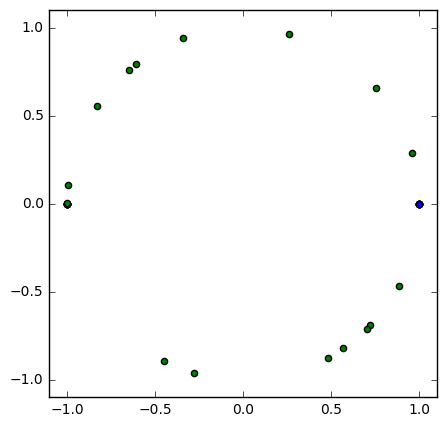

In [27]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

phytomer=16
phyllotactic_deviation_min=0
phyllotactic_deviation_max=90

az_min=leaf_azimuth(size=phytomer, phyllotactic_angle=180, phyllotactic_deviation=phyllotactic_deviation_min, plant_orientation=0, spiral=False)*pi/180
az_max=leaf_azimuth(size=phytomer, phyllotactic_angle=180, phyllotactic_deviation=phyllotactic_deviation_max, plant_orientation=0, spiral=False)*pi/180

x_min,y_min=pol2cart(rho=1,phi=az_min)
x_max,y_max=pol2cart(rho=1,phi=az_max)
    
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
#scatter(x,y,c=numpy.arange(phytomer))
scatter(x_min,y_min,c='blue')
scatter(x_max,y_max,c='green')
xlim(-1.1,1.1)
ylim(-1.1,1.1)


# II. Visualisation of 3D reconstructions and estimation of light interception

## II.1 Generate the mtg

In [20]:
g=generate_mtg(plant_height=200,
                 rmax=0.7,
                 skew=0.01,
                 wl=0.1,
                 incli_base=75,
                 incli_top=15,
                 delta_angle_base=250,
                 delta_angle_top=50,
                 plant_orientation=50,
                 phyllotactic_angle=180,
                 phyllotactic_deviation=10,
                 nb_leaf_segment=10)


## II.2 Illuminate the 3D plant 

In [10]:
plant_irradiance(g, isolated=True, illuminated=None)

{'Area': 0.79204850460000009,
 'Area_leaf': 0.69628399590000001,
 'Ei': 0.62663656272703494,
 'Ei_leaf': 0.67428460081748443}

## II.3 Visualisation

In [21]:
%gui qt4
from TD_maize import display

Raw visualisation

In [22]:
display(g,light=False)

Visualisation with irradiance

In [19]:
display(g,light=True)